Проверено 4 модели
1. DecisionTree - f1-score min 0.89 для класса внедорожник
2. DecisionTree grid - f1-score min 0.95 для класса внедорожник
3. RandomForest - f1-score min - 0.95 для класса внедорожник
4. KNN - f1-score min 0,96   для класса хэтчбек \ 
Выбрал  метрический алгоритм KNN среди рассмотренных т.к минимальное гармоническое среднее выше чем у остальных алгоритмов

### Вам предлагается набор данных, содержащий комплектации различных моделей автомобилей и их характеристики.
#### Мы предлагаем произвести с данным датасетом следующие операции: 
* 1. Анализ данных 
* 2. Фильтрация 
* 3. Преобразование переменных 
* 4. Классификация моделей по типу кузова (без подклассов, колонка type_car): - Седан - Хетчбек - Кроссовер - Внедорожник. 
#### Обосновать выбранный подход/метод машинного обучения. 

Описать способ оценки качества модели машинного обучения.
Необходимо детально описать все выполненные шаги.
Данное задание необходимо выполнить только на языке Python в Jupyter notebook

In [1]:
#Импорт необходимых библиотек и модулей
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials

In [2]:
#Настройка вывода кол. колонок
pd.set_option("display.max_columns",30)

https://socraticowl.com/post/integrate-google-sheets-and-jupyter-notebooks/

In [2]:
#получение доступа к файлу через API Google sheets с помощью сервисного аккаунта
scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('./credet_2.json', scope)
gc = gspread.authorize(credentials)
spreadsheet_key = '1hRg7tVl58adtYJElvQY3m8pSc60hGgX6NgsLe-bG7ds'
book = gc.open_by_key(spreadsheet_key)
worksheet = book.worksheet("Sheet1")
table = worksheet.get_all_values()

In [51]:
#Считываение данных
df = pd.DataFrame(table[1:], columns=table[0])    

In [4]:
#Просмотр прочитанных данных и их корректность
df.head(3)

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,...,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг


In [6]:
print('Количествно строк: ' ,df.shape[0])
print('Количествно столбцов: ' ,df.shape[1])

Количествно строк:  1703
Количествно столбцов:  21


In [8]:
#Просмотр признаков
df.describe().T

,count,unique,top,freq
brand,1703,27,Land Rover,166
model,1703,246,Range Rover Velar,34
complect,1703,1400,Sport 40 TFSI 7AMT,6
type_car,1703,37,Компактный кроссовер,379
seats,1703,8,5,1507
doors,1703,7,5,1027
Двигатель,1703,116,бензиновый (1598 см³),138
Мощность,1703,130,150 л. с.,274
Крутящий момент двигателя,1703,131,320 Н·м,112
Коробка передач,1703,16,автоматическая (8 ступеней),560


In [10]:
#Видно что пропусков в данных нет(значений None), и типы всех колонок object(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 21 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   brand                                                 1703 non-null   object
 1   model                                                 1703 non-null   object
 2   complect                                              1703 non-null   object
 3   type_car                                              1703 non-null   object
 4   seats                                                 1703 non-null   object
 5   doors                                                 1703 non-null   object
 6   Двигатель                                             1703 non-null   object
 7   Мощность                                              1703 non-null   object
 8   Крутящий момент двигателя                             1703 non-null 

### Описание данных
1. Brand - Марка машины - категориальный признак
2. model - Модель машины
3. complect - комплектация
4. type_car - тип кузова *Целевая переменная*
5. seats - кол. сидений - порядковый признак 
6. doors - кол. дверей - порядковый признак
7. Двигатель - можно разбить на тип двигателя-категориальный признак и его объём - количественный признак
8. Мощность - мошность двигателя в л.с. - количественный признак
9. Крутящий момент двигателя -  количественный признак
10. Коробка передач - можно разбить на тип корбки - категориальный признак и кол. ступеней - порядковый признак
11. Привод - категориальный
12. Разгон до 100 -время в секундах - количественный признак
13. Максимальная скорость км/ч - количественный признак
14. Расход топлива - (три показателя)- сделать средний расход - количественный признак
15. Дорожный просвет, мм - количественный признак
16. Габариты ДхШхВ - можно сделать признак объем общий - количественный признак
17. Колесная база, мм - количественный признак
18. Объём багажника, л - количественный признак
19. Объём багажника макс, л - количественный признак
20. Объём топливного бака, л - количественный признак
21. Масса автомобиля, кг - количественный признак

### По условию задачи нужно классифицировать данные на 4 класса :
1.  Седан 
2. Хетчбек
3. Кроссовер 
4. Внедорожник\
 На самом деле в данных более 4 классов, посмотрим на них и увидим что в большинстве ключевые слова записаны в контексте.\
 Нужно выделить эти классы.И удалить не целевые

In [11]:
#Просмотр всех типов авто
df['type_car'].unique()

array(['Седан класса C', 'Хэтчбек класса B', 'Седан класса D',
       'Универсал повышенной проходимости класса D', 'Универсал класса D',
       'Купе класса D', 'Хэтчбек класса D', 'Седан класса E',
       'Универсал класса E', 'Хэтчбек класса E', 'Седан класса F',
       'Большой кроссовер', 'Компактный кроссовер',
       'Среднеразмерный кроссовер', 'Купе класса C', 'Спорткупе',
       'Кабриолет с мягкой крышей', 'Спорткупе класса D',
       'Спортседан класса E', 'Родстер', 'Большой внедорожник',
       'Седан класса B', 'Хэтчбек класса A', 'Кроссовер класса B', 'Вэн',
       'Горячий хэтчбек класса C', 'Внедорожник класса B',
       'Среднеразмерный внедорожник', 'Хэтчбек класса C',
       'Универсал класса C', 'Спортседан класса D', 'Купе класса E',
       'Пикап', 'Горячий седан класса C', 'Минивэн', 'Компактвэн',
       'Универсал повышенной проходимости класса E'], dtype=object)

In [14]:
#Просмотр частотности и количества
print('Всего уникальных значений: ',df['type_car'].nunique())
df['type_car'].value_counts()

Всего уникальных значений:  37


Компактный кроссовер                          379
Среднеразмерный кроссовер                     236
Большой внедорожник                           129
Большой кроссовер                             115
Седан класса E                                104
Седан класса D                                 93
Седан класса B                                 91
Седан класса F                                 68
Вэн                                            53
Седан класса C                                 53
Хэтчбек класса B                               40
Компактвэн                                     39
Среднеразмерный внедорожник                    30
Хэтчбек класса C                               29
Хэтчбек класса D                               26
Пикап                                          26
Кроссовер класса B                             24
Хэтчбек класса E                               20
Купе класса D                                  16
Универсал класса E                             16


In [52]:
#Удалим столбцы с информацией о марке,модели и комплектации авто т.к они не помогут нам в классификации
#
# axis=1 указывает на то что удаляем столбцы, параметр inplace говорит о том что удаляем из исходного датафрема
# В колонке 'Разгон до сотни'  71 значение - "нет данных"
# В колонке 'Расход топлива'  - 48 значений - 0
df.drop(['brand','model','complect','Разгон до сотни','Расход топлива (л/100 км)\nгород / трасса / смешанный'],\
        axis=1,inplace=True)

In [53]:
#Изменим тип данных для признаков кол. сидений и кол.дверей к целому числу
df["seats"] = df["seats"].astype("int64")
df["doors"] = df["doors"].astype("int64")

In [39]:
def get_type_of_cars(type_car):
    """
    Функция принимает строку и ищет в ней ключевые слова, описывающих классы,
    Возвращает имя класса если он упомимается в строке иначе None
    """
    type_car = type_car.lower()
    if type_car.find('седан') != -1:
        return "Седан"
    elif type_car.find('кроссовер') != -1:
        return "Кроссовер"
    elif type_car.find('хэтчбек') != -1:
        return "Хетчбек"
    elif type_car.find('внедорожник') != -1:
        return "Внедорожник"
    else:
        return None     

In [54]:
# Применим функцию get_type_of_cars для получения меток
df['type_car'] = df["type_car"].apply(get_type_of_cars)

In [41]:
#изначально все строки были не пустые, после преобразования выявили 231 машину не относящуюся к нашим классам
print('Кол. строк без ключевых классов: ',df['type_car'].isnull().sum())
filtr = round(df['type_car'].isnull().sum()/  df.shape[0],2)
print(f'Процент отфильтрованных данных: {filtr} %')

Кол. строк без ключевых классов:  231
Процент отфильтрованных данных: 0.14 %


In [55]:
#Удаляем строки со значениям None
df.dropna(inplace=True)

In [43]:
df.shape

(1472, 16)

In [30]:
1703 - 231

1472

#### Функции для преобразования данных таблицы в числовые и извеление признаков

In [31]:
def not_00(x):
    """
    Функция для преобразования первого элемента (слова) строки в целое число
    """
    x= x.split()
    return int(x[0])

In [44]:
def lenght_and_hight(stroka):
    """
    Объем занимаемого авто 
    """
    stroka= stroka.split('×')
    stroka = list(map(int,stroka))
    return stroka[0] * stroka[1] * stroka[2]

In [45]:
def get_type_of_engine(stroka):
    stroka = stroka.split()
    engine = stroka[0]
    return engine

def get_volume_of_engine(stroka):
    stroka = stroka.split()
    volume = int(stroka[1][1:])
    return volume

In [46]:
def get_privod(stroka):
    stroka = stroka.split()
    return stroka[0]

In [47]:
def get_privod_count(stroka):
    stroka = stroka.split()
    volume = int(stroka[1][1])
    return volume

Создаем новую колонку и применяем к соответсвующей функциюю написанную ранее

In [56]:
df['Тип двигателя'] = df['Двигатель'].apply(get_type_of_engine)
df['Объем двигателя'] = df['Двигатель'].apply(get_volume_of_engine)

In [57]:
df['Мощность л/с'] = df['Мощность'].apply(lambda x : int(x[:3]))

In [58]:
df['Крутящий момент двигателя, H*м'] = df['Крутящий момент двигателя'].apply(not_00)

In [59]:
df['Тип коробки'] = df['Коробка передач'].apply(get_privod)
df['Кол передач'] = df['Коробка передач'].apply(get_privod_count)

In [60]:
df['Максимальная скорость, км/ч'] = df['Максимальная скорость'].apply(not_00)

In [61]:
df['Дорожный просвет, мм'] = df['Дорожный просвет'].apply(not_00)

In [62]:
df['Общий объм машины']= df['Габариты (длина × ширина × высота)'].apply(lenght_and_hight)

In [63]:
df['Колёсная база, мм'] = df['Колёсная база'].apply(not_00)

In [64]:
df['Объём багажника, л'] = df['Объём багажника'].apply(not_00)
df['Объём багажника макс, л'] = df['Объём багажника максимальный'].apply(not_00)

In [65]:
df['Объём топливного бака, л'] = df['Объём топливного бака'].apply(not_00)

In [66]:
df['Масса автомобиля, кг'] = df['Масса автомобиля'].apply(not_00)

Удаляем изначальные колонки, после создания новых с числовыми значениями

In [67]:
df.drop(['Масса автомобиля', \
                'Объём топливного бака','Объём багажника',\
                'Максимальная скорость','Мощность',\
                'Колёсная база','Дорожный просвет','Двигатель',\
                'Крутящий момент двигателя','Габариты (длина × ширина × высота)',\
                'Коробка передач','Объём багажника максимальный'], axis=1,inplace=True)

In [68]:
df.head()

,type_car,seats,doors,Привод,Тип двигателя,Объем двигателя,Мощность л/с,"Крутящий момент двигателя, H*м",Тип коробки,Кол передач,"Максимальная скорость, км/ч","Дорожный просвет, мм",Общий объм машины,"Колёсная база, мм","Объём багажника, л","Объём багажника макс, л","Объём топливного бака, л","Масса автомобиля, кг"
0,Седан,5,4,передний,бензиновый,1395,150,250,роботизированная,7,224,165,11337300288,2637,425,880,50,1320
1,Седан,5,4,передний,бензиновый,1395,150,250,роботизированная,7,224,165,11337300288,2637,425,880,50,1320
2,Седан,5,4,передний,бензиновый,1984,190,320,роботизированная,7,250,165,11337300288,2637,425,880,50,1395
3,Седан,5,4,полный,бензиновый,1984,190,320,роботизированная,7,242,165,11337300288,2637,390,845,55,1465
4,Седан,5,4,передний,бензиновый,1984,190,320,роботизированная,7,242,165,11337300288,2637,425,880,50,1395


In [69]:
#Провеям типы колонок
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1702
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   type_car                        1472 non-null   object
 1   seats                           1472 non-null   int64 
 2   doors                           1472 non-null   int64 
 3   Привод                          1472 non-null   object
 4   Тип двигателя                   1472 non-null   object
 5   Объем двигателя                 1472 non-null   int64 
 6   Мощность л/с                    1472 non-null   int64 
 7   Крутящий момент двигателя, H*м  1472 non-null   int64 
 8   Тип коробки                     1472 non-null   object
 9   Кол передач                     1472 non-null   int64 
 10  Максимальная скорость, км/ч     1472 non-null   int64 
 11  Дорожный просвет, мм            1472 non-null   int64 
 12  Общий объм машины               1472 non-null   

In [88]:
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [72]:
import matplotlib.pyplot as plt

In [75]:
#Посмотрим на сбалансированность классов 
df['type_car'].value_counts(normalize=True)

Кроссовер      0.512228
Седан          0.282609
Внедорожник    0.118207
Хетчбек        0.086957
Name: type_car, dtype: float64

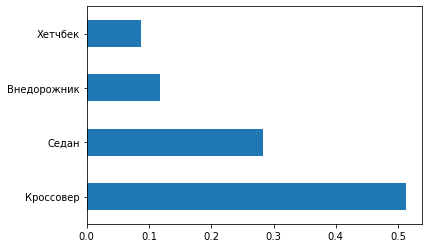

In [74]:
#Дизбаланс классов
df['type_car'].value_counts(normalize=True).plot(kind='barh')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028EC9A873A0>,
      dtype=object)

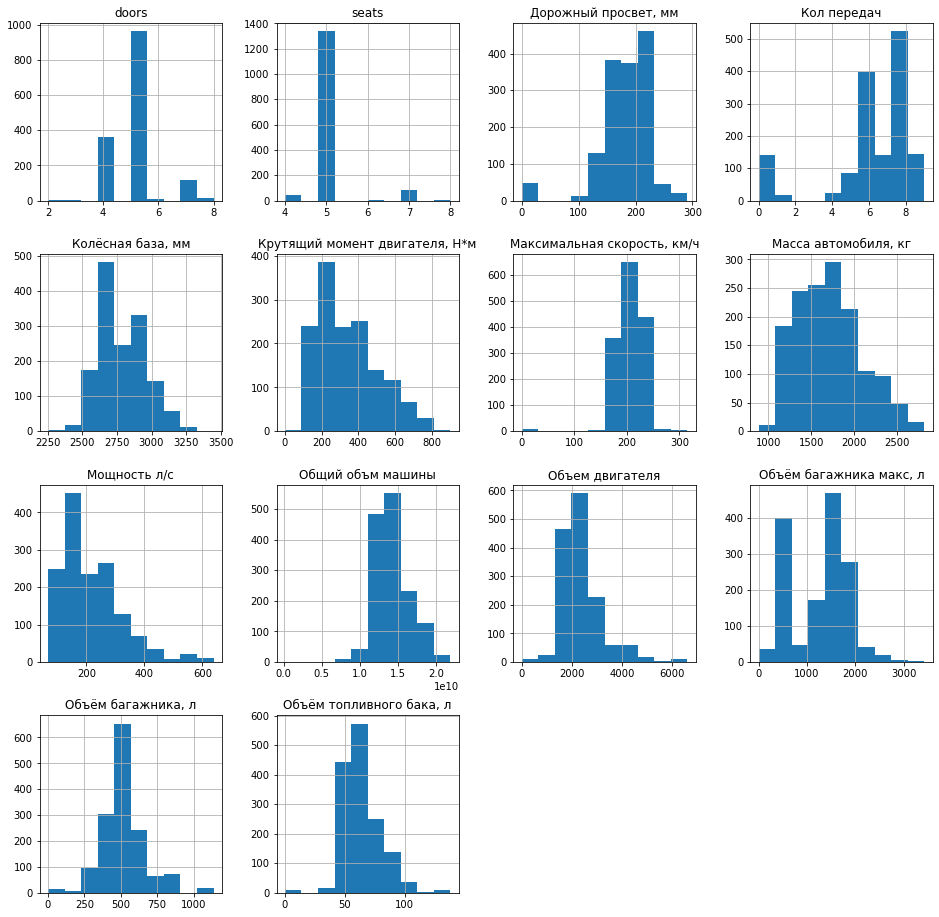

In [77]:
df.hist(figsize = (16,16))

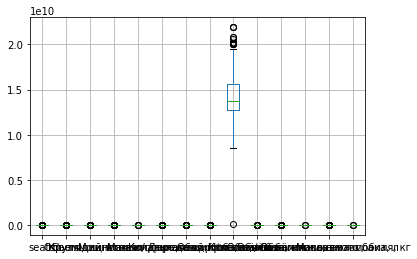

In [111]:
df.boxplot()

In [112]:
# дисперсия числовых данных
df.var()

seats                             2.851358e-01
doors                             6.728342e-01
Объем двигателя                   7.768212e+05
Мощность л/с                      1.013581e+04
Крутящий момент двигателя, H*м    2.756759e+04
Кол передач                       6.139859e+00
Максимальная скорость, км/ч       9.508027e+02
Дорожный просвет, мм              2.098705e+03
Общий объм машины                 5.337977e+18
Колёсная база, мм                 2.580252e+04
Объём багажника, л                2.238300e+04
Объём багажника макс, л           3.546031e+05
Объём топливного бака, л          2.357586e+02
Масса автомобиля, кг              1.414145e+05
dtype: float64

In [78]:
#Разбиваем очищенные данные 
X = df.drop(['type_car'],axis=1)
y = df['type_car']

In [81]:
#Кодируем  категориальные признаки как бинарные и удаляем один т.к. идет переопределение
X_dumm = pd.get_dummies(X[['Привод', 'Тип двигателя', 'Тип коробки']], drop_first=True)

In [82]:
#Например было три типа привода передний задний и полный, осталось две колонки и мы можем однозначно определить, когда привод задний
X_dumm.head()

,Привод_передний,Привод_полный,Тип двигателя_гибридный,Тип двигателя_дизельный,Тип двигателя_электрический,Тип коробки_вариатор,Тип коробки_механическая,Тип коробки_роботизированная
0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1


In [83]:
X = X.drop(['Привод', 'Тип двигателя', 'Тип коробки'],axis=1)
X = pd.concat([X, X_dumm],axis=1)#Соединяем два поднабора данных

In [84]:
X.head()

,seats,doors,Объем двигателя,Мощность л/с,"Крутящий момент двигателя, H*м",Кол передач,"Максимальная скорость, км/ч","Дорожный просвет, мм",Общий объм машины,"Колёсная база, мм",...,"Объём топливного бака, л","Масса автомобиля, кг",Привод_передний,Привод_полный,Тип двигателя_гибридный,Тип двигателя_дизельный,Тип двигателя_электрический,Тип коробки_вариатор,Тип коробки_механическая,Тип коробки_роботизированная
0,5,4,1395,150,250,7,224,165,11337300288,2637,...,50,1320,1,0,0,0,0,0,0,1
1,5,4,1395,150,250,7,224,165,11337300288,2637,...,50,1320,1,0,0,0,0,0,0,1
2,5,4,1984,190,320,7,250,165,11337300288,2637,...,50,1395,1,0,0,0,0,0,0,1
3,5,4,1984,190,320,7,242,165,11337300288,2637,...,55,1465,0,1,0,0,0,0,0,1
4,5,4,1984,190,320,7,242,165,11337300288,2637,...,50,1395,1,0,0,0,0,0,0,1


In [85]:
#Делим исходный датасет на трейн 70 % и тест 30% данные -  с сохранением баланса меток классов 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=24 , stratify=y)

In [102]:
X_train.shape, X_test.shape

((1030, 22), (442, 22))

### Пробуем Decision Tree как базовую модель непараметрическую и не линейную

In [103]:
#Обучение 
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)

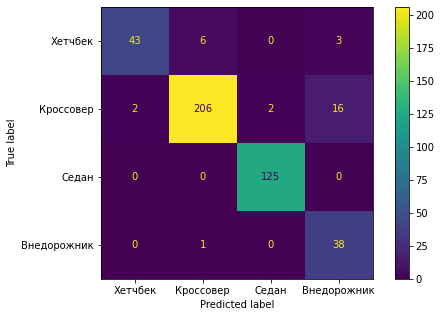

In [104]:
y_pred = clf.predict(X_test)
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=['Хетчбек','Кроссовер','Седан','Внедорожник'],
)

cmp.plot(ax=ax)
plt.show();

In [ ]:
DT плохо классфицируем внедорожник и кроссовер

In [105]:
from sklearn.metrics import classification_report
print('Отчет для дерева решения глубиной 5')
print(classification_report(y_test, y_pred))

Отчет для дерева решения глубиной 5
              precision    recall  f1-score   support

 Внедорожник       0.96      0.83      0.89        52
   Кроссовер       0.97      0.91      0.94       226
       Седан       0.98      1.00      0.99       125
     Хетчбек       0.67      0.97      0.79        39

    accuracy                           0.93       442
   macro avg       0.89      0.93      0.90       442
weighted avg       0.94      0.93      0.93       442



### Настройка Tree

In [126]:
clf = tree.DecisionTreeClassifier(max_depth=5,random_state=17)
tree_params = {'max_depth': range(2,11),'min_samples_leaf':range(1,5), 'min_samples_split' : range(1,5)}

locally_best_tree = GridSearchCV(clf, tree_params, cv=5, n_jobs=-1, verbose=True)                      

locally_best_tree.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   24.3s finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 11),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 5)},
             verbose=True)

In [127]:
print("Best params:", locally_best_tree.best_params_)

Best params: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [128]:
tuned_tree = tree.DecisionTreeClassifier(max_depth=8, random_state=17)
tuned_tree.fit(X_train,y_train)
tuned_tree_predictions = tuned_tree.predict(X_test)

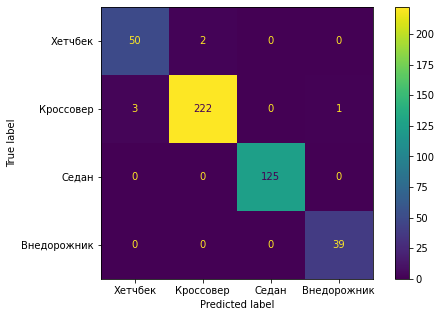

In [129]:
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, tuned_tree_predictions),
    display_labels=['Хетчбек','Кроссовер','Седан','Внедорожник'],
)

cmp.plot(ax=ax)
plt.show();

In [130]:
print('Отчет для дерева решения глубиной 8')
print(classification_report(y_test, tuned_tree_predictions))

Отчет для дерева решения глубиной 8
              precision    recall  f1-score   support

 Внедорожник       0.94      0.96      0.95        52
   Кроссовер       0.99      0.98      0.99       226
       Седан       1.00      1.00      1.00       125
     Хетчбек       0.97      1.00      0.99        39

    accuracy                           0.99       442
   macro avg       0.98      0.99      0.98       442
weighted avg       0.99      0.99      0.99       442



In [131]:
importances = pd.DataFrame({'feature':list(X), 'importance': np.round(tuned_tree.feature_importances_,4)})
importances = importances.sort_values('importance',ascending =False)
importances

,feature,importance
1,doors,0.3874
12,"Объём топливного бака, л",0.2085
7,"Дорожный просвет, мм",0.1684
8,Общий объм машины,0.0712
0,seats,0.0405
13,"Масса автомобиля, кг",0.0351
6,"Максимальная скорость, км/ч",0.0268
5,Кол передач,0.0205
10,"Объём багажника, л",0.0148
9,"Колёсная база, мм",0.0092


### Random Forest

In [132]:
rf = RandomForestClassifier(n_estimators=100, random_state = 17)
rf.fit(X_train,y_train)
forest_predictions = rf.predict(X_test)

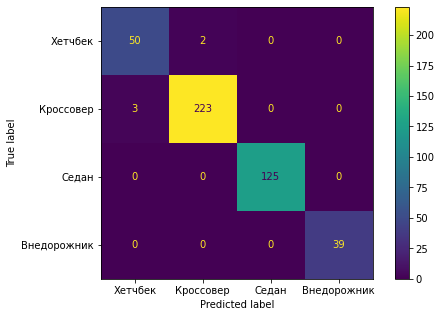

In [133]:
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, forest_predictions),
    display_labels=['Хетчбек','Кроссовер','Седан','Внедорожник'],
)

cmp.plot(ax=ax)
plt.show();

In [134]:
print('Отчет для ансамблей деревьев')
print(classification_report(y_test, forest_predictions))

Отчет для ансамблей деревьев
              precision    recall  f1-score   support

 Внедорожник       0.94      0.96      0.95        52
   Кроссовер       0.99      0.99      0.99       226
       Седан       1.00      1.00      1.00       125
     Хетчбек       1.00      1.00      1.00        39

    accuracy                           0.99       442
   macro avg       0.98      0.99      0.99       442
weighted avg       0.99      0.99      0.99       442



### Попробуем классификатор KNN  непараметрический и не линейный

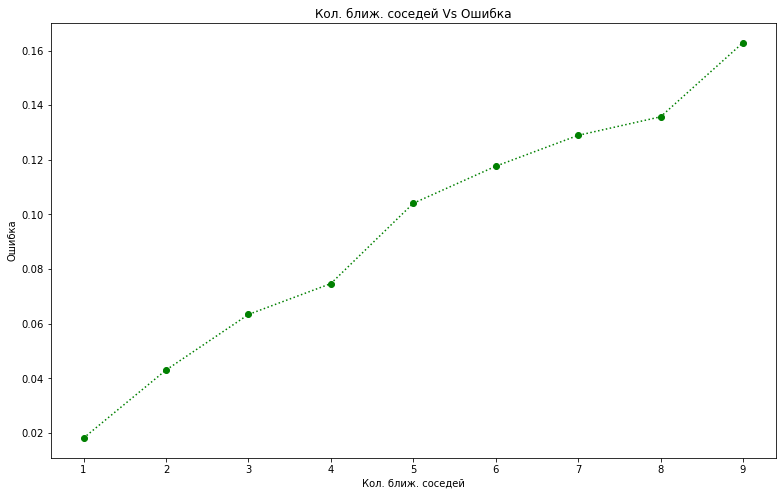

In [96]:
#Чтобы установить оптимальное значение K-соседей, я использовал метод локтя;
#на графике ниже показана частота ошибок при 10 значениях K.
#Частота ошибок рассчитывается как среднее значение, 
#когда прогнозируемое значение не равно фактическому значению
# частота ошибок уменьшается; впоследствии она имеет тенденцию увеличиваться и насыщаться для некоторых значений K, 
#и эта закономерность прослеживается по всему графику.
error_rate=[]
for i in range(1,10):
            knn = KNeighborsClassifier(n_neighbors=i)
            model = knn.fit(X_train,y_train)
            pred_i = knn.predict(X_test)
            error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(13,8))
plt.plot(range(1,10), error_rate, linestyle = 'dotted', marker = 'o',color = 'g')
plt.xlabel('Кол. ближ. соседей')
plt.ylabel('Ошибка')
plt.title('Кол. ближ. соседей Vs Ошибка')
plt.show() 

In [107]:
#примем K = 1
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

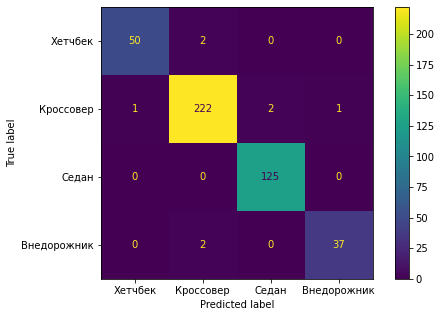

In [108]:
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=['Хетчбек','Кроссовер','Седан','Внедорожник'],
)

cmp.plot(ax=ax)
plt.show();

In [ ]:
#Конечно для KNN нужно нормализация данных , но даже так он работает  отлично

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Внедорожник       0.98      0.96      0.97        52
   Кроссовер       0.98      0.98      0.98       226
       Седан       0.98      1.00      0.99       125
     Хетчбек       0.97      0.95      0.96        39

    accuracy                           0.98       442
   macro avg       0.98      0.97      0.98       442
weighted avg       0.98      0.98      0.98       442



#### Попробуем один линейный классификатор используя технику OvA для этого нужно провести нормализацию данных

In [115]:
to_log = ['Крутящий момент двигателя, H*м','Масса автомобиля, кг','Мощность'] 
to_scale = ['Объем двигателя','Максимальная скорость, км/ч','Дорожный просвет, мм','Общий объм машины','Колёсная база, мм',\
'Объём багажника, л','Объём багажника макс, л','Объём топливного бака, л']

In [117]:
lm = LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

###  Не успевал доделать

In [123]:
#Без нормиования признаков, не работает. Не успевал доделать
y_pred = lm.predict(X_test)

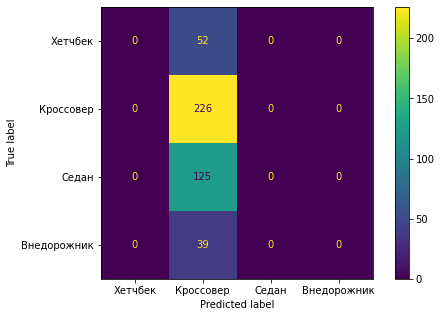

In [124]:
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=['Хетчбек','Кроссовер','Седан','Внедорожник'],
)

cmp.plot(ax=ax)
plt.show();